# <center> Домашнее задание 4 </center>

In [ ]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import random as rd
from random import sample
import scipy.stats as sts
from scipy import special
import seaborn as sns
import time
from tqdm import tqdm


%matplotlib inline

## 1. Матрица Тёплица (30 баллов)

1. Напишите функцию, которая на вход принимает вектор уникальных значений {$a_{n-1},  \dots, a_{0}, \dots, a_{-(n+1)}$} и размер матрицы, а выдает сгенерированную на основании этих значений [матрицу Тёплица](https://en.wikipedia.org/wiki/Toeplitz_matrix). В решении нельзя использовать готовые реализации из ```scipy.linalg``` или других библиотек, но необходимо использовать ```numpy```. 
2. Напишите функцию, которая принимает на вход матрицу размера $N \times N$ и проверяет, является ли она матрицей Тёплица. Функция должна вернуть в ответе булевое значение (```True``` или ```False```). 

1

In [ ]:
def toeplitz_matrix(vec):
    n = int((vec.shape[0] + 1) / 2)
    ans = np.zeros((n, n), int)
    for i in range(vec.shape[0]):
        ans += np.diagflat(np.array([vec[i]] * min(i + 1, 2 * n - 1 - i)), i - (n - 1))
    return ans

In [ ]:
vec = np.array([1,2,3,4,5,6,7,8,9])

In [ ]:
toeplitz_matrix(vec)

array([[5, 6, 7, 8, 9],
       [4, 5, 6, 7, 8],
       [3, 4, 5, 6, 7],
       [2, 3, 4, 5, 6],
       [1, 2, 3, 4, 5]])

2

In [ ]:
def toeplitz_matrix_checker(matrix):
    IsToeplitz = True
    n = matrix.shape[0]
    for i in range(-n+1, n):
        x = np.diagonal(matrix, i) 
        if np.unique(x).size == 1:
            IsToeplitz = True
        else:
            IsToeplitz = False
            break
    return IsToeplitz

In [ ]:
matrix = np.array([
       [5, 6, 7, 8, 9],
       [4, 5, 6, 7, 8],
       [3, 4, 5, 6, 7],
       [2, 3, 4, 5, 6],
       [1, 2, 3, 4, 5]])

In [ ]:
toeplitz_matrix_checker(matrix)

True

## 2. Ищем лучшую однушку на ЦИАНе (35 баллов)

В этом задании будем скачивать объявления о продаже однокомнатных квартир в Москве c [ЦИАНа](https://www.cian.ru/cat.php?deal_type=sale&engine_version=2&offer_type=flat&p=1&region=1&room1=1) и выберем самую понравившуюся из них! :3

1. Напишите функцию, которая парсит все объявления с одной страницы и по каждому из них сохраняет ссылку (href) на объявление с более подробной информацией. Примените эту функцию для первых 10 страниц, сохранив все href в одном списке. Если хотите собрать полную информацию и не боитесь быть забаненными, можете скачать все 54 страницы.

2. Напишите функцию, которая для каждой (href) страницы с объявлением квартиры качает и сохраняет: 
* **Общую стоимость**
* **Адрес**
* **Ближайшее метро**
* **Тип жилья**
* **Площадь комнат**
* **Этаж**
* **Срок сдачи**

Сохраните эту информацию в DataFrame.

3. Избавьтесь от лишних символов в колонках с ценой квартиры, этажом и площадью комнат, приведя их к числову типу. Определите пороги по этим переменным, ниже или выше которых вы будете считать это жилье неподходящим. Например, цена не более 15 миллионов, этаж не ниже 2, общая площадь не менее 40 $м^2$. Можете выбрать другие наиболее важные для вас критерии, всего их должно быть не меньше 3. 
Отфильтруйте DataFrame, оставив только те объявления, которые удовлетворяют условиям. Отсортируйте оставшиеся объявления по возрастанию цены и отобразить топ-10 финальных кандидатов. Понравилась какая-нибудь квартира из них? :) 

1

In [ ]:
def parse_page(num_page):
    url = 'https://www.cian.ru/cat.php?deal_type=sale&engine_version=2&offer_type=flat&p={}&region=1&room1=1'.format(num_page)
    response = requests.get(url)
    tree = BeautifulSoup(response.content, 'html.parser')
    info = tree.find_all('div', {'class':'_93444fe79c--content--2IC7j'})
    answer = []
    for item in info:
        answer.append(item.a.get('href'))
    
    return answer

In [ ]:
all_hrefs = []
for i in range(10):
    all_hrefs += parse_page(i)
all_hrefs

['https://www.cian.ru/sale/flat/246614632/',
 'https://www.cian.ru/sale/flat/246614666/',
 'https://www.cian.ru/sale/flat/244750187/',
 'https://www.cian.ru/sale/flat/241020123/',
 'https://www.cian.ru/sale/flat/246637828/',
 'https://www.cian.ru/sale/flat/240748079/',
 'https://www.cian.ru/sale/flat/244703533/',
 'https://www.cian.ru/sale/flat/242213434/',
 'https://www.cian.ru/sale/flat/238073308/',
 'https://www.cian.ru/sale/flat/243306819/',
 'https://www.cian.ru/sale/flat/245980827/',
 'https://www.cian.ru/sale/flat/244325026/',
 'https://www.cian.ru/sale/flat/232199279/',
 'https://www.cian.ru/sale/flat/245694284/',
 'https://www.cian.ru/sale/flat/239821227/',
 'https://www.cian.ru/sale/flat/245966501/',
 'https://www.cian.ru/sale/flat/245966788/',
 'https://www.cian.ru/sale/flat/233566586/',
 'https://www.cian.ru/sale/flat/245263487/',
 'https://www.cian.ru/sale/flat/244078596/',
 'https://www.cian.ru/sale/flat/227079612/',
 'https://www.cian.ru/sale/flat/242203837/',
 'https://

2

In [ ]:
def parser(href):
    answer = []
    url = href
    response = requests.get(url)
    tree = BeautifulSoup(response.content, 'html.parser')
    info_price = tree.find('span', {'itemprop':'price'})
    info_address = tree.find('div', {'data-name':'Geo'})
    info_metro = tree.find('li', {'data-name':'renderUnderground'})
    info_type = tree.find('li', {'data-name':'AdditionalFeatureItem'})
    
    # так как какая-то информация на некоторых страницах отсутствует, я использую словарь и try/except


    # в словаре для данных по площади, этажу и сроку сдачи 5 возможных ключей: 'Общая', 'Жилая', 'Кухня', 'Этаж', 'Срок сдачи'
    # 'Жилая', 'Кухня', 'Срок сдачи' есть не везде, поэтому применяю .get()
    info_add_cat = tree.find_all('div', {'class':'a10a3f92e9--info-title--2bXM9'})
    info_add_value = tree.find_all('div', {'class':'a10a3f92e9--info-value--18c8R'})
    info_add_dict = {}
    for i in range(len(info_add_cat)):
        info_add_dict[info_add_cat[i].text] = info_add_value[i].text
    try:
        info_add_dict['Жилая'] = info_add_dict.get('Жилая').split()[0] 
    except:
        info_add_dict['Жилая'] = info_add_dict.get('Жилая')
    
    try:
        info_add_dict['Кухня'] = info_add_dict.get('Кухня').split()[0]
    except:
        info_add_dict['Кухня'] = info_add_dict.get('Кухня')
        
    info_add_dict['Срок сдачи'] = info_add_dict.get('Срок сдачи')
    # применяю split к площади, чтобы сразу избавиться от м^2
    
    # метро
    try:
        metro_station = info_metro.find('a', {'class':'a10a3f92e9--underground_link--AzxRC'}).text
    except:
        metro_station = None
    
    # тип жилья 
    try:
        type_ = info_type.find('span', {'class':'a10a3f92e9--value--3Ftu5'}).text
    except:
        type_ = None
    
    
    
    answer.append({'href': href,
                   'price': info_price.get('content'),
                   'address': info_address.find('span', {'itemprop':'name'}).get('content'),
                   'metro_station': metro_station,
                   'type': type_,
                   'square_all': info_add_dict['Общая'].split()[0],
                   'square_rooms': info_add_dict['Жилая'],
                   'square_kitchen': info_add_dict['Кухня'],
                   'floor': info_add_dict['Этаж'],
                   'deadline': info_add_dict['Срок сдачи']
                  })
      
    return answer

In [ ]:
answer = []
for href in all_hrefs:
    answer += parser(href)

In [ ]:
data = pd.DataFrame(answer)

3

In [ ]:
data['floor'] = data['floor'].apply(lambda x: int(x.split()[0]))

In [ ]:
data['price'] = data['price'].apply(lambda x: int(''.join(x.split()[:-1])))

Для работы с данными избавлюсь от пропусков

In [ ]:
data = data[data['square_rooms'].isnull() == False]
data = data[data['square_kitchen'].isnull() == False]

Для отбора осталось привести данные по площади к числовому формату

In [ ]:
data['square_all'] = data['square_all'].apply(lambda x: float('.'.join(x.split(','))))
data['square_rooms'] = data['square_rooms'].apply(lambda x: float('.'.join(x.split(','))))
data['square_kitchen'] = data['square_kitchen'].apply(lambda x: float('.'.join(x.split(','))))

Мои критерии: 
    - общая площадь не менее 45 квадратных метров
    - цена не более 10 миллионов рублей
    - площадь кухне не менее 15 квадртных метров

In [ ]:
data_top = data[(data['square_all'] >= 45) & (data['price'] <= 15000000) & (data['square_kitchen'] >= 15)]
data_top.shape[0]

14

Осталось выбрать 10 из 11:)

In [ ]:
data_top.sort_values(by=['price'], inplace=True)
data_top.head(10)

<ipython-input-18-bc8eb5386179>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_top.sort_values(by=['price'], inplace=True)


,href,price,address,metro_station,type,square_all,square_rooms,square_kitchen,floor,deadline
17,https://www.cian.ru/sale/flat/233566586/,8568913,"Москва, НАО (Новомосковский), Десеновское посе...",Ольховая,Новостройка,48.30,13.5,23.6,8,4 кв. 2021
45,https://www.cian.ru/sale/flat/233566586/,8568913,"Москва, НАО (Новомосковский), Десеновское посе...",Ольховая,Новостройка,48.30,13.5,23.6,8,4 кв. 2021
159,https://www.cian.ru/sale/flat/246604052/,9900000,"Москва, НАО (Новомосковский), Сосенское поселе...",Коммунарка,Вторичка,45.00,14.0,20.0,9,None
72,https://www.cian.ru/sale/flat/227079674/,11214440,"Москва, СВАО, р-н Лосиноостровский, Янтарный п...",Бабушкинская,Новостройка,49.10,14.5,17.5,16,3 кв. 2021
20,https://www.cian.ru/sale/flat/227079612/,11405930,"Москва, СВАО, р-н Лосиноостровский, Янтарный п...",Бабушкинская,Новостройка,49.10,14.5,17.5,14,3 кв. 2021
48,https://www.cian.ru/sale/flat/227079612/,11405930,"Москва, СВАО, р-н Лосиноостровский, Янтарный п...",Бабушкинская,Новостройка,49.10,14.5,17.5,14,3 кв. 2021
133,https://www.cian.ru/sale/flat/227079594/,11405930,"Москва, СВАО, р-н Лосиноостровский, Янтарный п...",Бабушкинская,Новостройка,49.10,14.5,17.5,11,3 кв. 2021
262,https://www.cian.ru/sale/flat/242721042/,11600000,"Москва, НАО (Новомосковский), Московский посел...",Говорово,Вторичка,46.00,24.0,16.0,2,None
11,https://www.cian.ru/sale/flat/244325026/,12551630,"Москва, СВАО, р-н Алексеевский, Новоалексеевск...",Алексеевская,Новостройка Апартаменты,45.75,12.5,20.1,6,4 кв. 2021
39,https://www.cian.ru/sale/flat/244325026/,12551630,"Москва, СВАО, р-н Алексеевский, Новоалексеевск...",Алексеевская,Новостройка Апартаменты,45.75,12.5,20.1,6,4 кв. 2021



## 3. Дефолты (35 баллов)

Судя по стоимости недвижимости в Москве, придется влезть в долги... Проанализируем, как часто люди не отдают ипотеки и кредиты! 

В файле ```defaults.csv``` предоставлены данные, которые можно использовать для анализа клиентской базы, предсказания дефолта, кредитного скоринга (т.е. для оценки кредитных рисков клиентов). 

Переменные:
* **ID** - идентификатор клиента;
* **LIMIT_BAL** - сумма предоставленного кредита/ипотеки (в долларах);
* **SEX** - пол (1=мужской, 2=женский);
* **EDUCATION** - уровень образования (1=научная степень, 2=высшее, 3=среднее, 4=другое, 5 и 6=неизвестно);
* **MARRIAGE** - семейное положение (1=женат/замужем, 2=холост/незамужняя, 3=другое);
* **AGE** - возраст (в годах);
* **PAY_0** - Статус погашения кредита в сентябре (-1 = надлежащая оплата, 1 = задержка платежа на один месяц, 2 = задержка платежа на два месяца, ... 8 = задержка платежа на восемь месяцев, 9 = задержка платежа на девять месяцев и более). **PAY_2, PAY_3, ..., PAY_6** - в августе, июле, июне, мае и апреле соответственно;
* **BILL_AMT1** - Сумма выписки по счету в сентябре (в долларах). **BILL_AMT2, BILL_AMT3, ..., BILL_AMT6** - в августе, июле, июне, мае и апреле соответственно;
* **PAY_AMT1** - Сумма предыдущего платежа в сентябре (в долларах). **PAY_AMT1, PAY_AMT2, ..., PAY_AMT6** - в августе, июле, июне, мае и апреле соответственно;
* **default.payment.next.month**: произошел дефолт (1=да, 0=нет).

Нужно проанализировать набор данных банка, выполнив следующие задания:
1. Загрузить данные и преобразуйте в pd.DataFrame. Какого размера этот датасет? Посмотрите на первые 10 строк ваших данных. С помощью ```random.randint()``` в диапазоне значений индексов строк сгенерируйте случайное число $N$ и верните строки из датафрейма по индексам от $N$ до $N + 20$.<br>
2. Отобразите количество пропущенных значений во всех колонках.  <br>
3. Выведите количество уникальных клиентов в датасете, покажите не менее 2 разных способов это сделать. <br>
4. Проверьте, есть ли среди клиентов дисбаланс в количестве женщин и мужчин? Какого их соотношение (в процентах)? <br>
5. Создайте новую переменную **AGE_BINS** с категориями по переменной возраст (= возрастными диапазонами). Постройте и сравните графики распределения клиентов по значениям переменных *AGE* и *AGE_BINS*. Клиенты каких возрастов чаще всего приходят за кредитом в этот банк? Есть ли преимущество использования переменной c категориям? <br>
6. Выведите общее количество клиентов с дефолтом и без него. Постройте гистограмму с процентным отношением этих групп. Как можно оценить, велика ли полученная доля клиентов с дефолтом? <br>
7. Постройте гистограмму и график плотности распределения по суммам предоставленных кредитов (*LIMIT_BAL*) для каждой из групп клиентов отдельно (с дефолтом и без), поместив их на один график. Сделайте размер графика побольше, поменяйте дефолтные цвета. 
8. На основе графика из предыдущего пункта, ответьте на вопросы:
* По кредитам какого размера чаще всего происходят дефолты?
* На основе графиков плотности распределения, начиная от какой суммы кредита клиентов без дефолта становится больше, чем клиентов с дефолтом? 
* Как по графику определить, есть ли такие одобренные суммы кредитов, по которым никогда не происходит дефолт? Выведите значения а) сумм кредитов, по которым всегда встречается дефолт, б) и те, по которым никогда не бывает дефолта. <br>
9. Постройте матрицу корреляций для всех переменных по статусу погашения кредита. Добавьте значения корреляций на график. Есть ли общий тренд по возрастанию/убыванию корреляции по времени (всем месяцам)? <br>
10. Напишите функцию, которая возвращает словарь, где ключ - это сумма одобренного кредита, а значение - это вложенный словарь. В нем по ключу ```ratio``` хранится отношение клиентов с дефолтом к тем, у кого его не было, с такой суммой кредитов, а по ключу ```num_clients```  - общее число клиентов с таким кредитом. Пример элемента словаря: ``` {50000.0 : {'ratio': 0.357, 'num_clients': 3365}```. Отсортируйте получившийся словарь по ключу ```ratio``` в убывающем порядке. У какого размера кредита наибольшая доля клиентов с дефолтом? А сколько в датасете клиентов, по которым посчитана эта доля? Можем ли мы сделать вывод, что в целом не стоит одобрять эту сумму для кредита новым клиентам? <br>

Важно! Каждый график должен содержать как минимум заголовок и подписанные оси. 

#### 1)

In [ ]:
data = pd.read_csv('defaults.csv', delimiter=',')
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [ ]:
data.shape

(30000, 25)

В этом датасете данные 30000 клиентов по 25 параметрам

In [ ]:
data.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [ ]:
N = rd.randint(0, 29980)

In [ ]:
data[N : N + 20]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
10332,10333,200000.0,1,2,1,41,-2,-2,-2,-2,...,23627.0,3977.0,1100.0,0.0,1400.0,1110.0,1000.0,0.0,1736.0,1
10333,10334,50000.0,1,2,2,27,0,0,0,0,...,48020.0,49439.0,45771.0,2187.0,1700.0,2000.0,2044.0,1319.0,30000.0,0
10334,10335,70000.0,2,2,2,23,-2,-2,-1,0,...,21436.0,19987.0,19939.0,3999.0,44446.0,41.0,19995.0,6000.0,10305.0,0
10335,10336,50000.0,2,2,1,45,0,0,0,0,...,9215.0,8011.0,5615.0,2022.0,2000.0,0.0,1000.0,1904.0,1664.0,0
10336,10337,20000.0,1,2,2,57,0,0,0,0,...,19501.0,19274.0,19703.0,3000.0,1500.0,1600.0,900.0,900.0,600.0,0
10337,10338,20000.0,2,2,1,47,3,2,2,2,...,19294.0,19840.0,19376.0,1300.0,0.0,1700.0,1000.0,0.0,850.0,1
10338,10339,200000.0,1,1,2,32,1,2,2,2,...,20217.0,22896.0,22400.0,0.0,3000.0,0.0,3000.0,0.0,3000.0,1
10339,10340,460000.0,1,1,2,28,0,0,-1,-1,...,3284.0,732.0,2732.0,1500.0,9681.0,3284.0,732.0,2000.0,0.0,0
10340,10341,140000.0,2,1,2,28,1,-2,-2,-2,...,0.0,50000.0,0.0,0.0,0.0,0.0,50000.0,0.0,0.0,0
10341,10342,240000.0,1,1,3,65,0,0,0,-1,...,1000.0,0.0,167747.0,1000.0,0.0,1000.0,0.0,167747.0,4810.0,0


#### 2)

Количество пропущенных значений во всех колонках

In [ ]:
for name in data.columns:
    p = data[data[name].isnull() == True].shape[0]
    print(name + ':', '{:.2f}'.format(p))

ID: 0.00
LIMIT_BAL: 0.00
SEX: 0.00
EDUCATION: 0.00
MARRIAGE: 0.00
AGE: 0.00
PAY_0: 0.00
PAY_2: 0.00
PAY_3: 0.00
PAY_4: 0.00
PAY_5: 0.00
PAY_6: 0.00
BILL_AMT1: 0.00
BILL_AMT2: 0.00
BILL_AMT3: 0.00
BILL_AMT4: 0.00
BILL_AMT5: 0.00
BILL_AMT6: 0.00
PAY_AMT1: 0.00
PAY_AMT2: 0.00
PAY_AMT3: 0.00
PAY_AMT4: 0.00
PAY_AMT5: 0.00
PAY_AMT6: 0.00
default.payment.next.month: 0.00


Пропусков нет ни в одной колонке

#### 3) Выведите количество уникальных клиентов в датасете, покажите не менее 2 разных способов это сделать

Первый способ

In [ ]:
data['ID'].nunique()

30000

Второй способ

In [ ]:
len(set(data['ID'].values))

30000

Количество уникальных клиентов 30000

#### 4) Проверьте, есть ли среди клиентов дисбаланс в количестве женщин и мужчин? Какого их соотношение (в процентах)? 

In [ ]:
share_of_men = data[data['SEX']==1].shape[0] / data.shape[0] * 100
share_of_women = data[data['SEX']==2].shape[0] / data.shape[0] * 100
'Доля мужчин составляет {:.2f} %, доля женщин составляет {:.2f} %'.format(share_of_men, share_of_women)

'Доля мужчин составляет 39.63 %, доля женщин составляет 60.37 %'

Есть дисбаланс: женщин значительно больше в этом датасете

#### 5) Создайте новую переменную AGE_BINS с категориями по переменной возраст (= возрастными диапазонами). Постройте и сравните графики распределения клиентов по значениям переменных AGE и AGE_BINS. Клиенты каких возрастов чаще всего приходят за кредитом в этот банк? Есть ли преимущество использования переменной c категориям? 

In [ ]:
plt.style.use('seaborn')
%config InlineBackend.figure_format = 'retina'

In [ ]:
ages = data['AGE'].unique()
np.sort(ages)

array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 79])

Возрастные диапазоны: 
    '20 - 30',
    '30 - 40',
    '40 - 50',
    '50 - 60',
    '60 - 70',
    '70+'

In [ ]:
conditions = [
    (data['AGE'] >=20) & (data['AGE'] < 30),
    (data['AGE'] >=30) & (data['AGE'] <= 40),
    (data['AGE'] >=40) & (data['AGE'] <= 50),
    (data['AGE'] >=50) & (data['AGE'] <= 60),
    (data['AGE'] >=60) & (data['AGE'] <= 70),
    (data['AGE'] > 70)
    ]

In [ ]:
values = ['20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70', '70+']

In [ ]:
data['AGE_BINS'] = np.select(conditions, values)

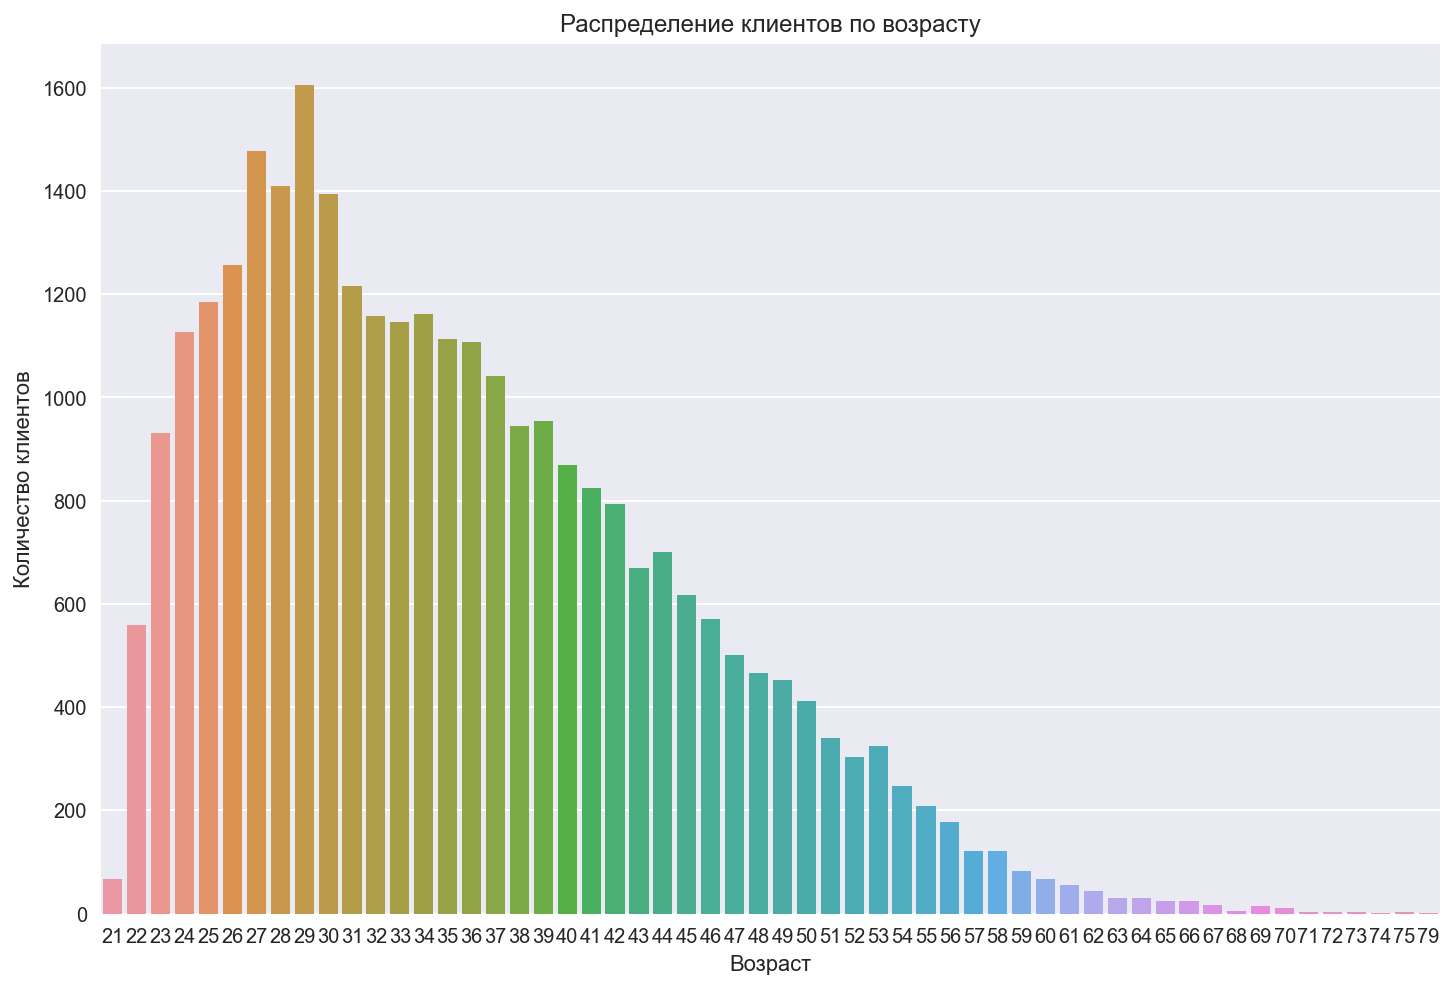

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(data['AGE'])
ax.set_xlabel('Возраст')
ax.set_ylabel('Количество клиентов')
plt.title('Распределение клиентов по возрасту')
plt.show()

In [ ]:
# чтобы зафиксировать столбы в порядке увеличения возраста 
data['AGE_BINS'] = pd.Categorical(data['AGE_BINS'], ['20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70', '70+'])

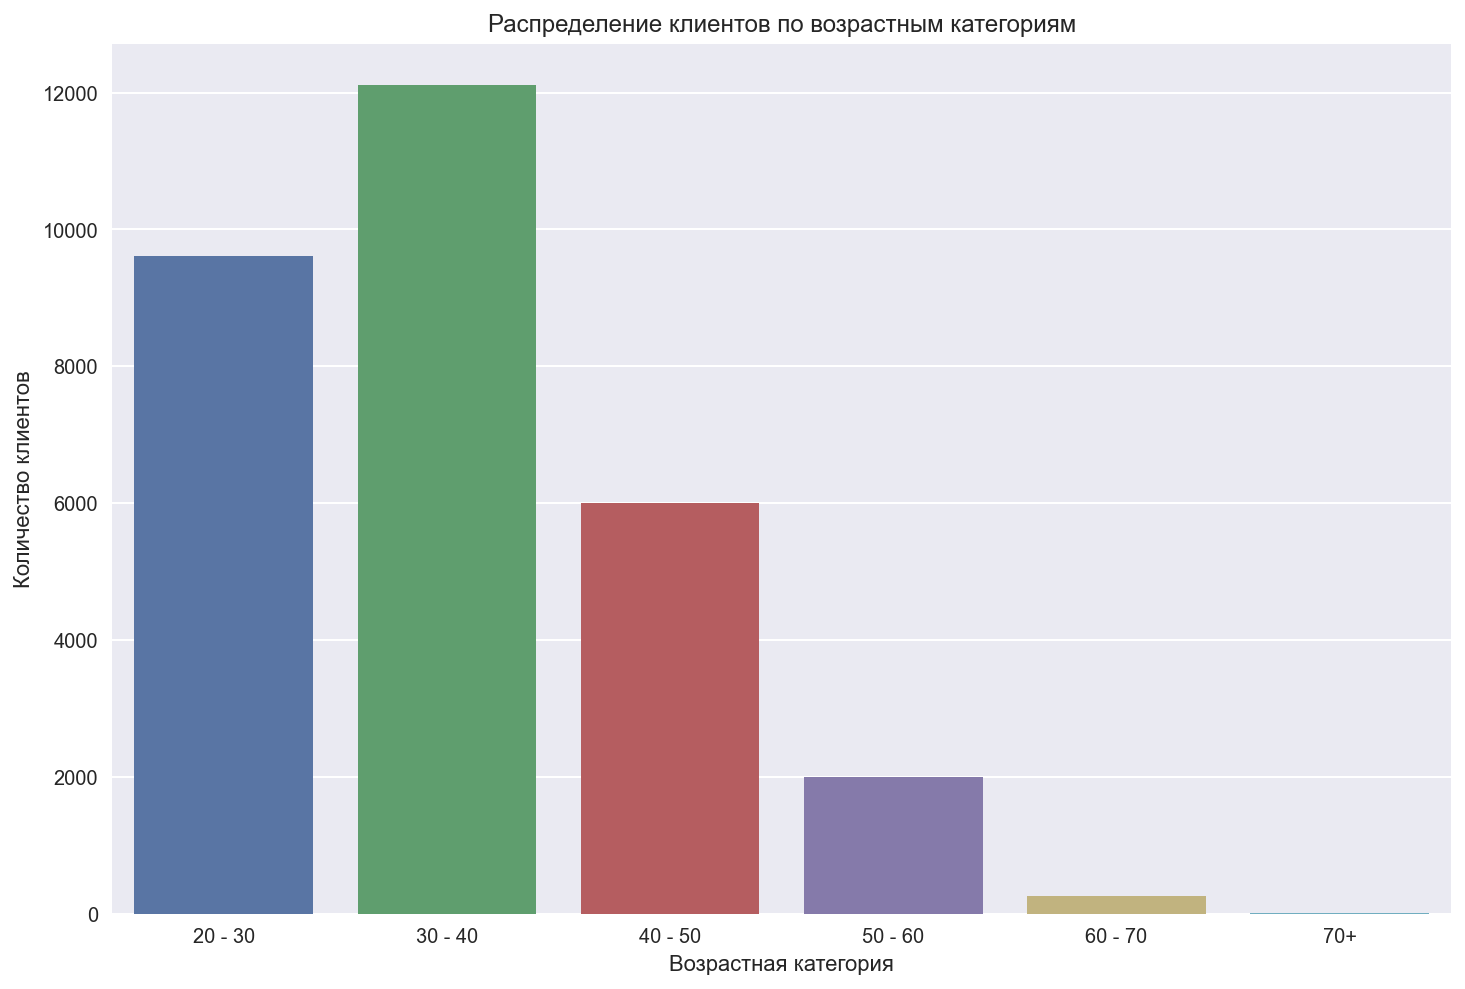

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(data['AGE_BINS'])
ax.set_xlabel('Возрастная категория')
ax.set_ylabel('Количество клиентов')
plt.title('Распределение клиентов по возрастным категориям')
plt.show()

Распределения в обоих случаях описывают одинаковую тенденцию: максимальная доля клиентов приходится на долю людей в районе 30 лет. Категориальный данные удобнее, так как деление на группы даст имеет на практике больше смысла. Например, на этих данных вышло, что самое большое количество клиентов приходится на 29 лет, но на других данных это число может отличаться. А вывод о том, что самая популярная категория "30-40", вероятно, не изменится. Категориальные показатели более устойчивы к изменению данных.

#### 6) Выведите общее количество клиентов с дефолтом и без него. Постройте гистограмму с процентным отношением этих групп. Как можно оценить, велика ли полученная доля клиентов с дефолтом? 

In [ ]:
default_clients = data[data['default.payment.next.month']==1].shape[0]
non_default_clients = data[data['default.payment.next.month']==0].shape[0]

Общее количество клиентов с дефолтом:

In [ ]:
default_clients

6636

Общее количество клиентов без дефолта:

In [ ]:
non_default_clients

23364

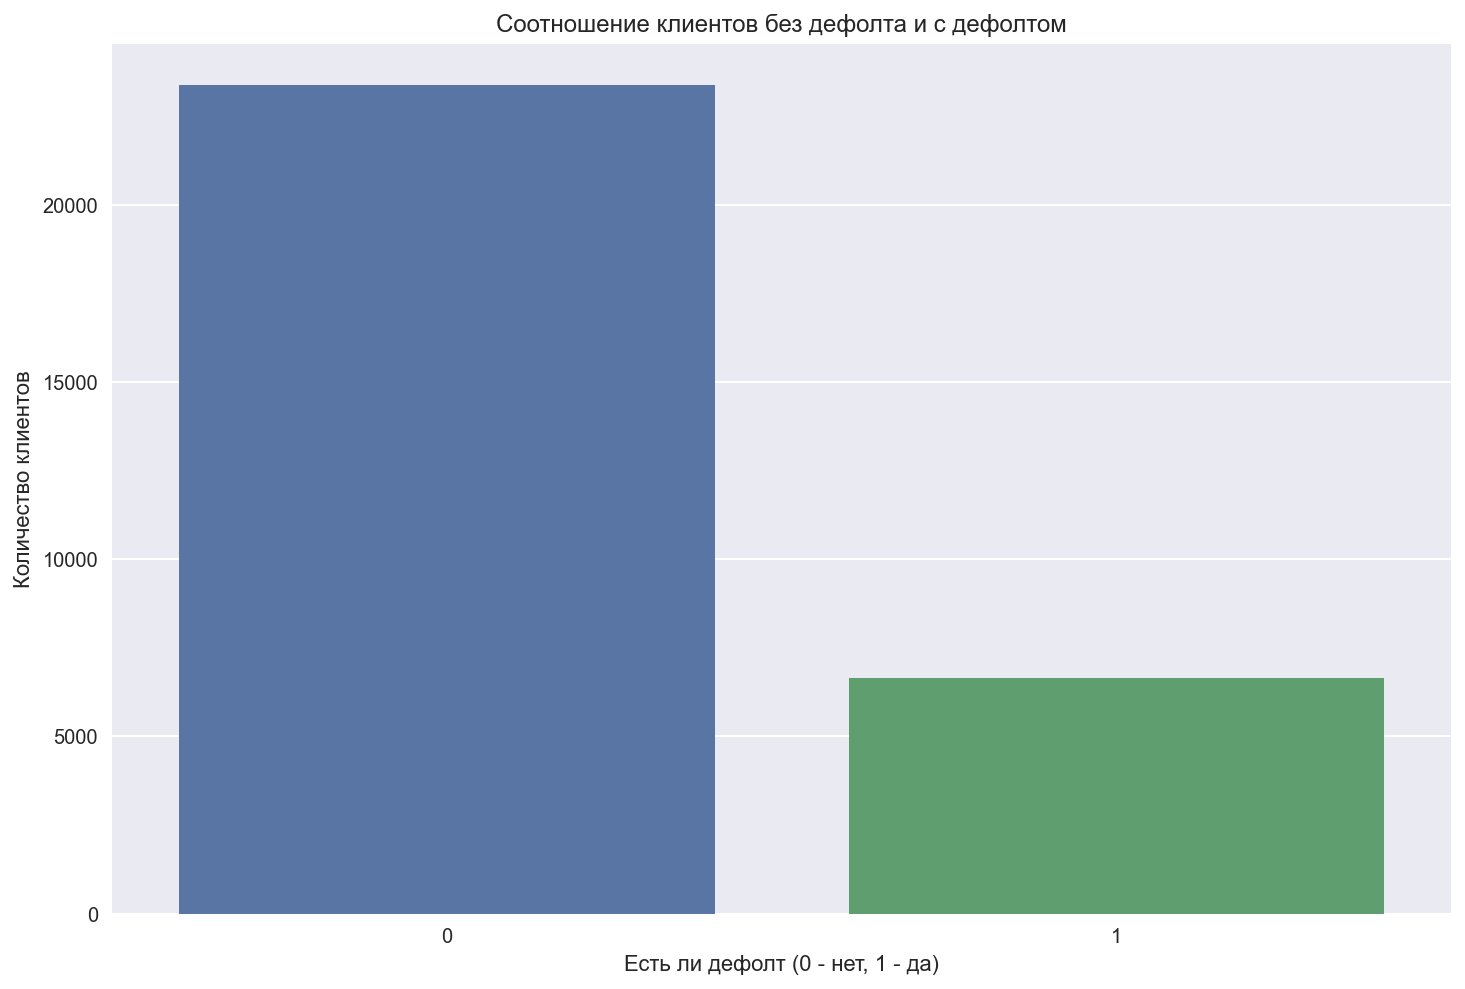

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(data['default.payment.next.month'])
ax.set_xlabel('Есть ли дефолт (0 - нет, 1 - да)')
ax.set_ylabel('Количество клиентов')
plt.title('Соотношение клиентов без дефолта и с дефолтом')
plt.show()

Полученная доля клиентов с дефолтом достаточно велика, так как составляет примерно четверть (дае больше) от клиентов без дефолта, то есть, это пятая часть от всех клиентов.

#### 7) Постройте гистограмму и график плотности распределения по суммам предоставленных кредитов (LIMIT_BAL) для каждой из групп клиентов отдельно (с дефолтом и без), поместив их на один график. Сделайте размер графика побольше, поменяйте дефолтные цвета

In [ ]:
data['LIMIT_BAL'].nunique()

81

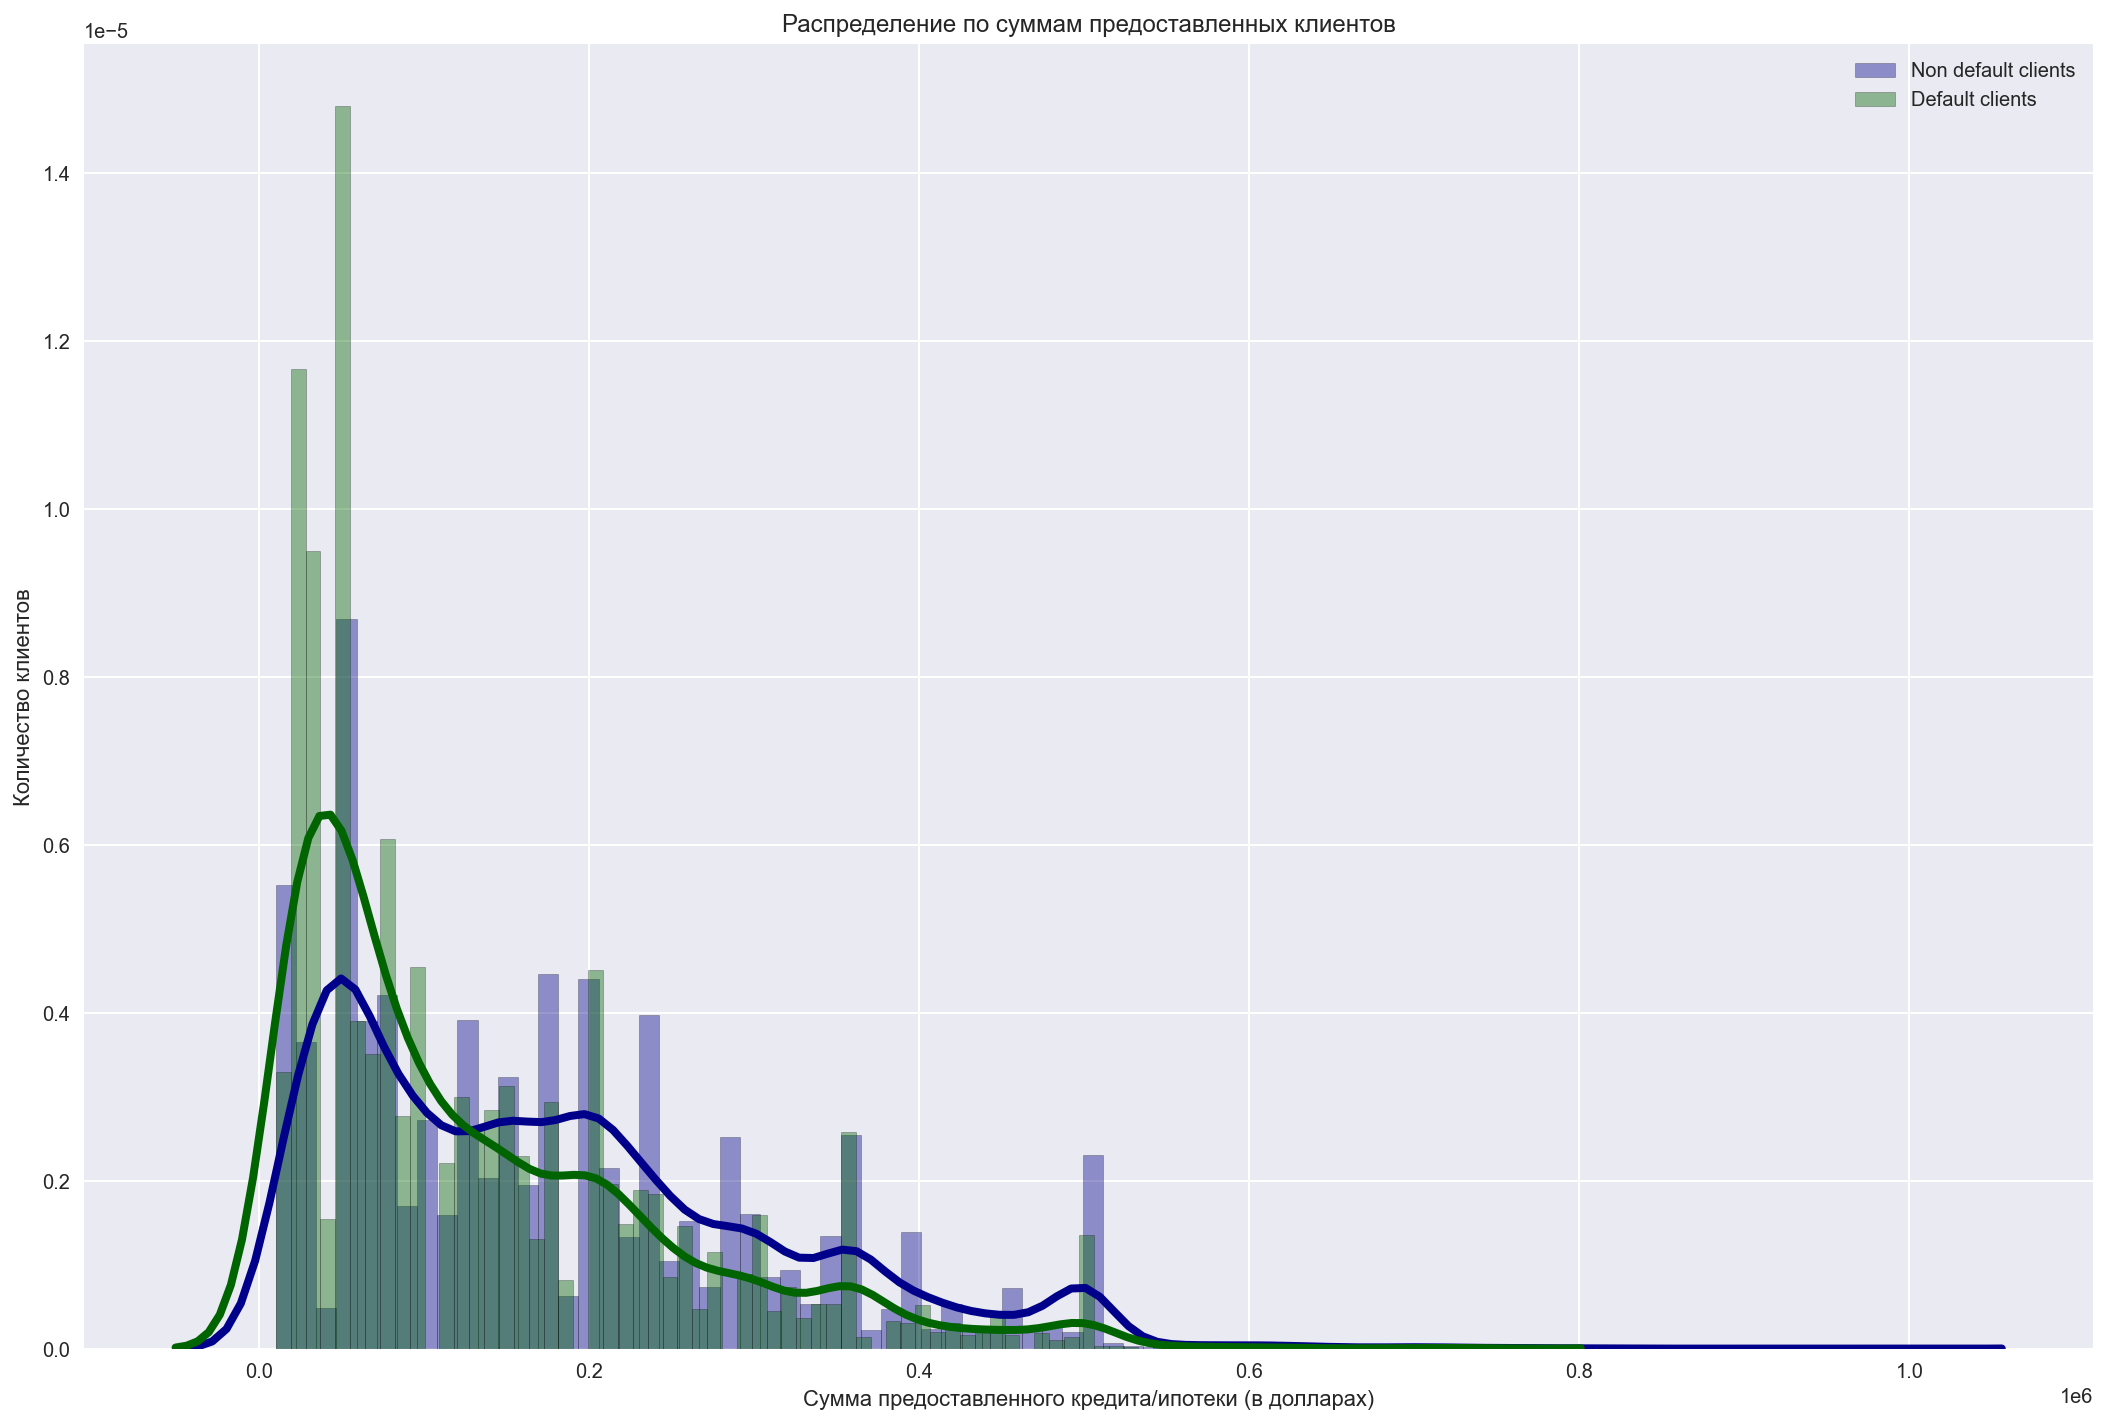

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(18, 12))


sns.distplot(data[data['default.payment.next.month']==0]['LIMIT_BAL'], hist=True, kde=True, 
             bins=data['LIMIT_BAL'].nunique(), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
             label='Non default clients')
sns.distplot(data[data['default.payment.next.month']==1]['LIMIT_BAL'], hist=True, kde=True, 
             bins=data['LIMIT_BAL'].nunique(), color = 'darkgreen', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
             label='Default clients')
ax.legend(loc='best')
ax.set_xlabel('Сумма предоставленного кредита/ипотеки (в долларах)')
ax.set_ylabel('Количество клиентов')
plt.title('Распределение по суммам предоставленных клиентов')
plt.show()

#### 8) На основе графика из предыдущего пункта, ответьте на вопросы:

#### 9) По кредитам какого размера чаще всего происходят дефолты?

Чаще всего происходят дефолты по кредитам на небольшие суммы до 100 тысяч долларов  (примерно 50 тысяч). 

#### 10) На основе графиков плотности распределения, начиная от какой суммы кредита клиентов без дефолта становится больше, чем клиентов с дефолтом?



Клиентов без дефолта становится больше, чем с дефолтом, начиная с суммы кредита более 100 тысяч долларов (примерно 120 тысяч). 

#### 11) Как по графику определить, есть ли такие одобренные суммы кредитов, по которым никогда не происходит дефолт? Выведите значения а) сумм кредитов, по которым всегда встречается дефолт, б) и те, по которым никогда не бывает дефолта. 

Да, есть такие суммы кредитов, по которым никогда не происходит дефолт.

а) Группирую данные по 'LIMIT_BAL' и считаю среднее. Если по суммам всегда встречается дефолт, тогда в колонке 'default.payment.next.month' будет 1

In [ ]:
data_new = data.groupby('LIMIT_BAL')['default.payment.next.month'].mean()

In [ ]:
list(data_new[data_new==1].index)

[327680.0]

б) Если по суммам никогда не бывает дефолта, тогда в колонке 'default.payment.next.month' будет 0

In [ ]:
list(data_new[data_new==0].index)

[16000.0,
 540000.0,
 570000.0,
 610000.0,
 640000.0,
 650000.0,
 660000.0,
 670000.0,
 690000.0,
 700000.0,
 730000.0,
 750000.0,
 760000.0,
 780000.0,
 800000.0,
 1000000.0]

#### 12) Постройте матрицу корреляций для всех переменных по статусу погашения кредита. Добавьте значения корреляций на график. Есть ли общий тренд по возрастанию/убыванию корреляции по времени (всем месяцам)? 


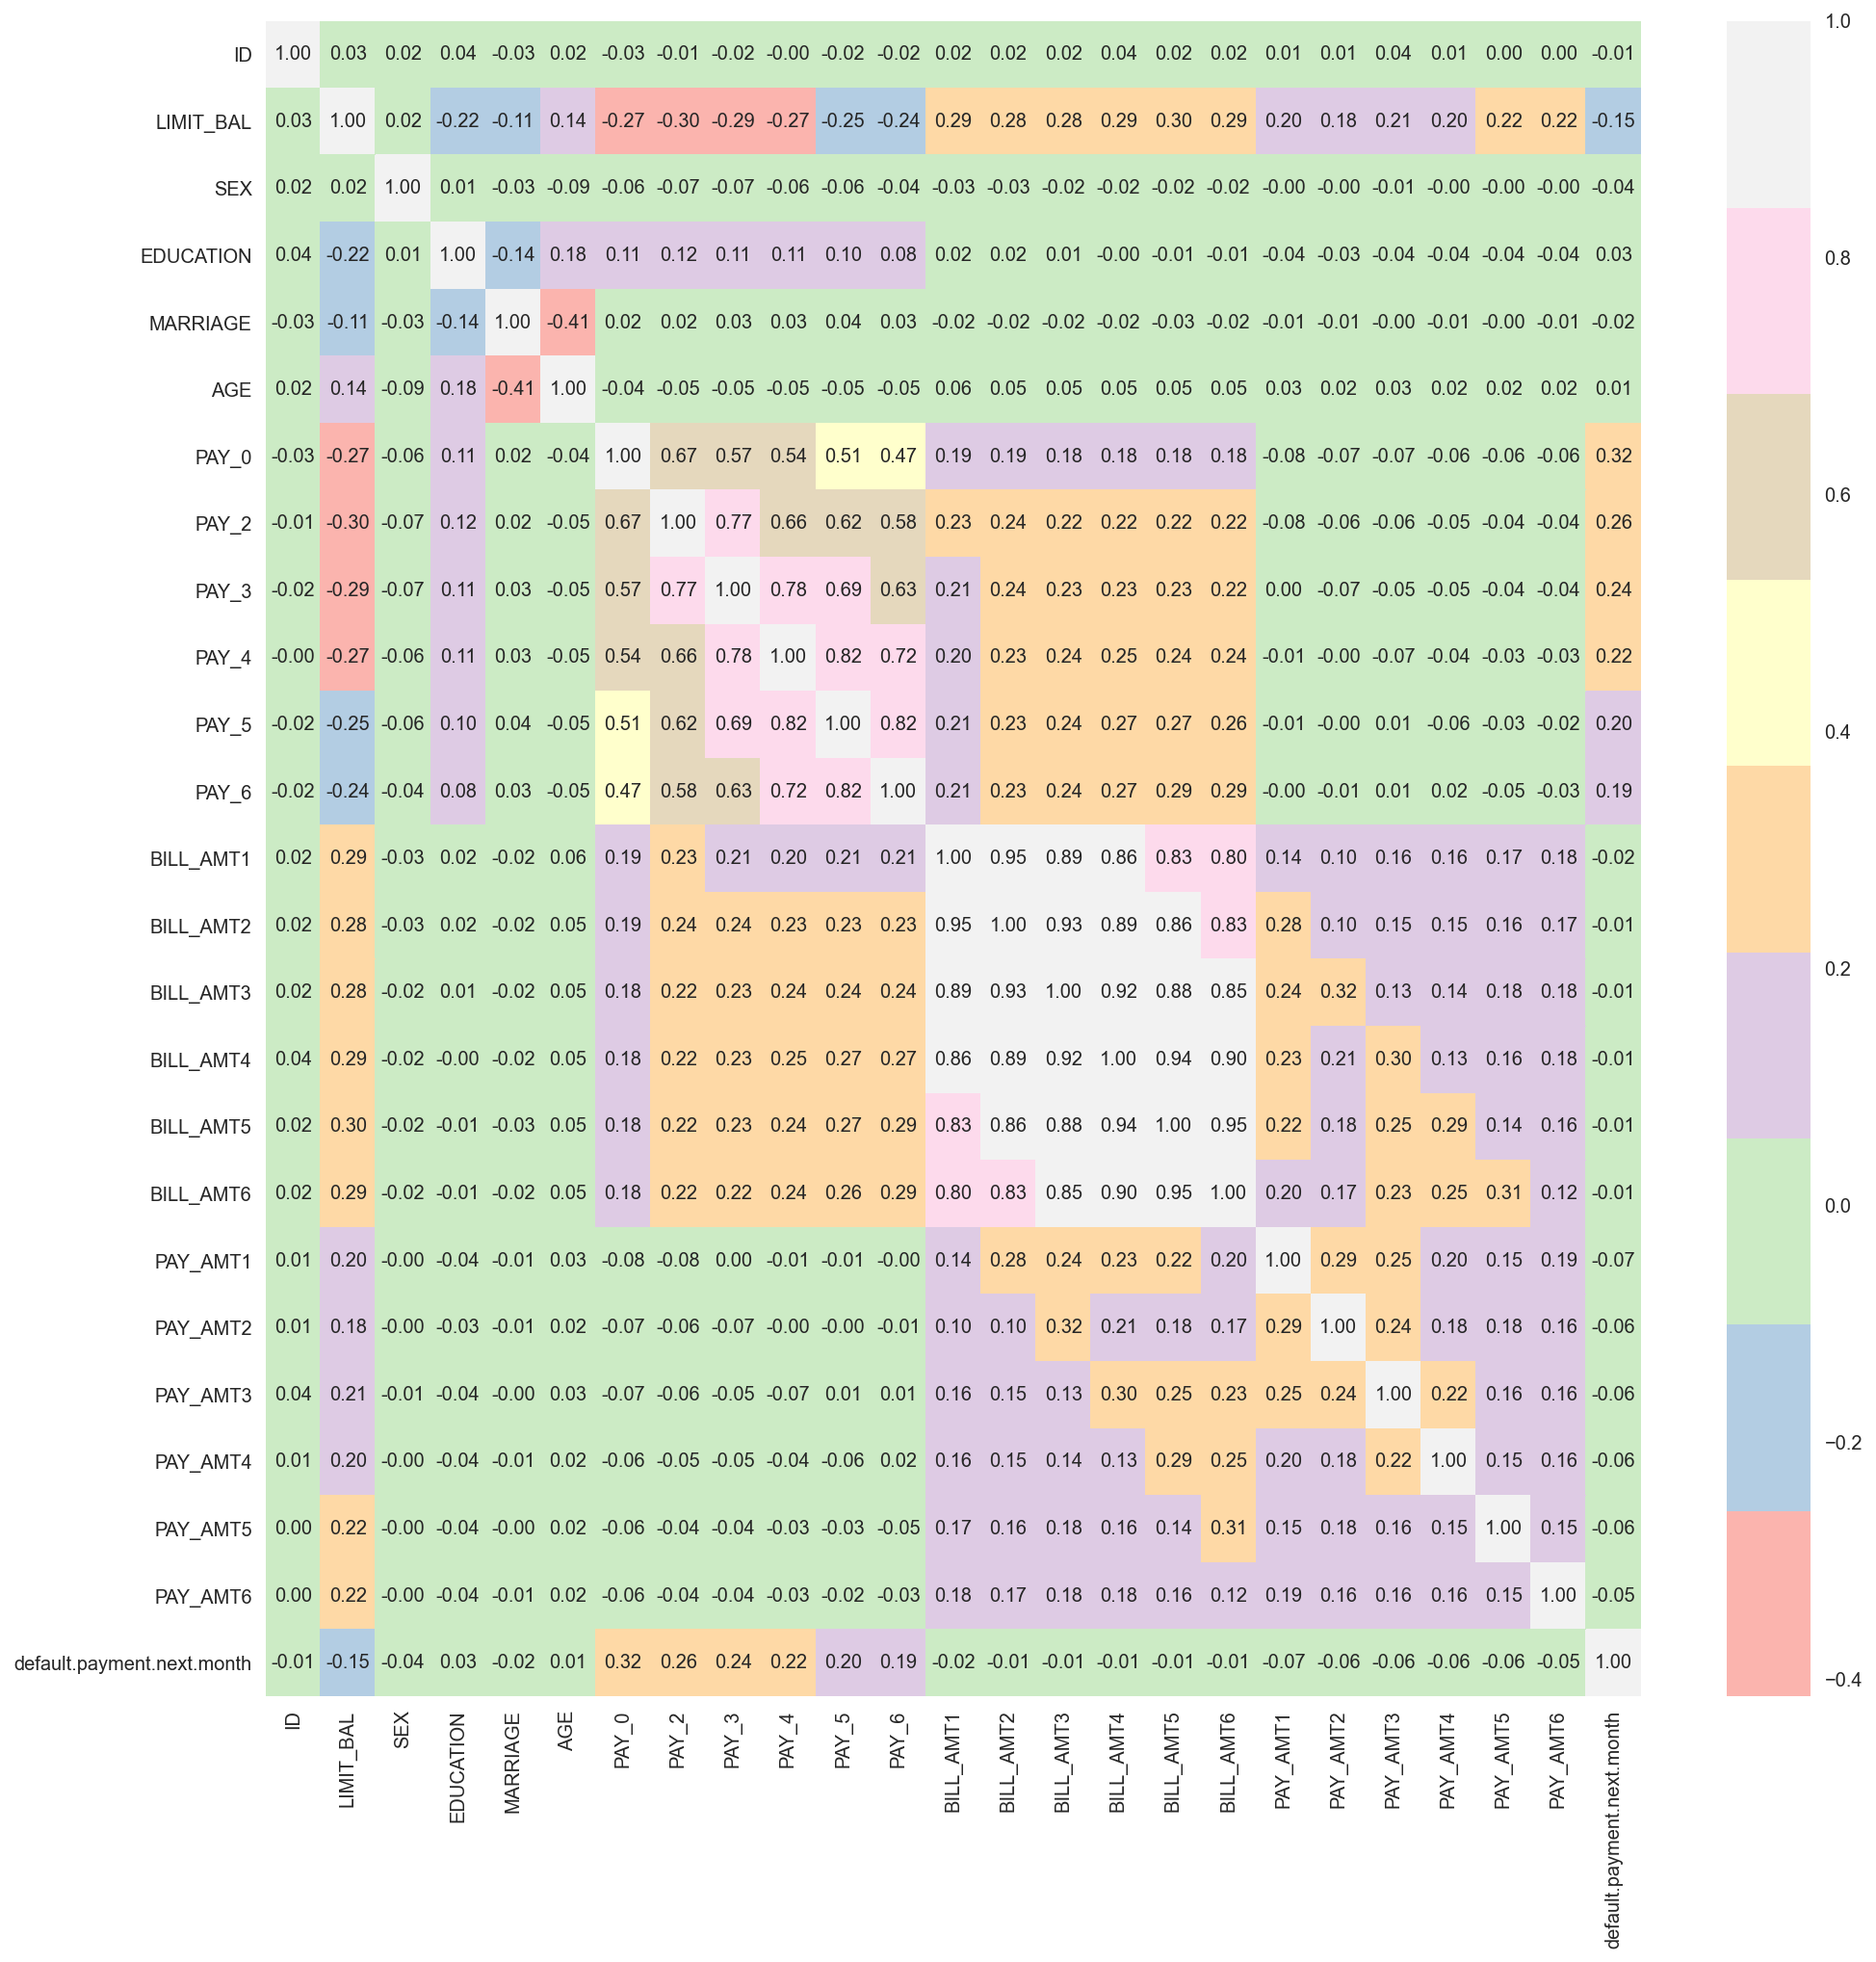

In [ ]:
plt.figure(figsize=(16, 16))

sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='Pastel1')

По месяцам не особо меняется коррелляция


#### 13) Напишите функцию, которая возвращает словарь, где ключ - это сумма одобренного кредита, а значение - это вложенный словарь. В нем по ключу ratio хранится отношение клиентов с дефолтом к тем, у кого его не было, с такой суммой кредитов, а по ключу num_clients - общее число клиентов с таким кредитом. Пример элемента словаря: {50000.0 : {'ratio': 0.357, 'num_clients': 3365}. Отсортируйте получившийся словарь по ключу ratio в убывающем порядке. У какого размера кредита наибольшая доля клиентов с дефолтом? А сколько в датасете клиентов, по которым посчитана эта доля? Можем ли мы сделать вывод, что в целом не стоит одобрять эту сумму для кредита новым клиентам? 

In [ ]:
limits = data['LIMIT_BAL'].unique()

In [ ]:
dict1 = {}
for limit in limits:
    dict2 = {}
    dict1[limit] = dict2
    if data[(data['LIMIT_BAL']==limit) & (data['default.payment.next.month']==0)].shape[0] != 0:
        dict2['ratio'] = float('{:.3f}'.format( 
            data[(data['LIMIT_BAL']==limit) & (data['default.payment.next.month']==1)].shape[0] / data[(data['LIMIT_BAL']==limit) & (data['default.payment.next.month']==0)].shape[0]
        ))
    else:
        dict2['ratio'] = 1000000000000
    dict2['num_clients'] = data[data['LIMIT_BAL']==limit].shape[0]

In [ ]:
dict1[50000.0]

{'ratio': 0.357, 'num_clients': 3365}

In [ ]:
dict_sorted = sorted(dict1.items(), key=lambda x: x[1]['ratio'], reverse=True)

In [ ]:
dict_sorted

[(327680.0, {'ratio': 1000000000000, 'num_clients': 1}),
 (740000.0, {'ratio': 1.0, 'num_clients': 2}),
 (40000.0, {'ratio': 0.667, 'num_clients': 230}),
 (10000.0, {'ratio': 0.666, 'num_clients': 493}),
 (20000.0, {'ratio': 0.546, 'num_clients': 1976}),
 (30000.0, {'ratio': 0.545, 'num_clients': 1610}),
 (720000.0, {'ratio': 0.5, 'num_clients': 3}),
 (70000.0, {'ratio': 0.403, 'num_clients': 731}),
 (550000.0, {'ratio': 0.4, 'num_clients': 21}),
 (60000.0, {'ratio': 0.394, 'num_clients': 825}),
 (50000.0, {'ratio': 0.357, 'num_clients': 3365}),
 (100000.0, {'ratio': 0.351, 'num_clients': 1048}),
 (90000.0, {'ratio': 0.342, 'num_clients': 651}),
 (680000.0, {'ratio': 0.333, 'num_clients': 4}),
 (120000.0, {'ratio': 0.327, 'num_clients': 726}),
 (80000.0, {'ratio': 0.301, 'num_clients': 1567}),
 (140000.0, {'ratio': 0.294, 'num_clients': 749}),
 (110000.0, {'ratio': 0.289, 'num_clients': 588}),
 (130000.0, {'ratio': 0.274, 'num_clients': 729}),
 (190000.0, {'ratio': 0.272, 'num_clients'

In [ ]:
dict_sorted[0]

(327680.0, {'ratio': 1000000000000, 'num_clients': 1})

Наибольшая доля клиентов с дефолтом для суммы 327680 долларов (на самом деле там в знаменателе 0, отдельно пришлось присвоить значение 1000000000000 для этого случая). Все клиенты (а это ровно 1 человек), кому одобрили кредит на такую сумму, с дефолтом. Вывод о том, что одобрять такую сумму не стоит, сделать нельзя, так как в выборке только один человек. 

Если не брать этот случай в рассмотрение, так как присутствует деление на 0 и в целом выборка не очень репрезентативная, то следующее максимальное значение ratio равно 1.0 для суммы кредита 740000 долларов. Кредит на такую сумму был одобрен 2 людям (один с дефолтом, другой - без). Опять же слишком мало клиентов, чтобы делать выводы о том, что люди обязательно будут с дефолтом. Еще один аргумент в пользу того, что не одобрять эту сумму на основе этих данных не стоит: кредиты на большие суммы (например, 760000, 780000 имеют ratio = 0).

## *4. Друзья друзей (бонусное, 30 баллов) 

1. С помощью VK API скачайте id всех ваших друзей. Убедитесь, что у вас открытый аккаунт, иначе будет ошибка доступа, и ничего скачать не удастся. Если вы не хотите открывать аккаунт, можете выбрать другой (например, аккаунт какой-то известной личности). 
2. Напишите функцию, которая с помощью ```users.get``` и ```friends.get``` по каждому человеку из списка друзей скачивает имя, фамилию, пол, город, дату рождения, образование, количество друзей. Напишите исключение, если у друга закрытый аккаунт, чтобы не включать его в анализ и функция не ломалась. 
3. Постройте график распределения количества друзей по всем друзьям. Создайте переменную ```friends_count_cat```, которая на основе количество друзей принимает значения $1$ - если друзей мало, $2$ - средне, $3$ - много друзей. Определите диапазоны для этих значений на основе графика с распределением. Постройте гистограмму по новой переменной. 
4. Разбейте колонку с образованием на две колонки ```university``` и ```faculty```, в первой сохранив название университета, во второй - название факультета. Удалите исходную колонку с образованием. Сгруппируйте данные по полу и постройте для каждой из групп на одном графике распределения 1) по городам, 2) университету, 3) факультету. Какие наблюдаются различия по этим переменным между девушками и молодыми людьми? 

In [ ]:
# Your code here